# darknet train in colab

colab을 이용하여 darknet train을 실시합니다.
무료로 이용하면 런타임이 계속 끊기거나, GPU 사용시간이 초과할 수 있으니, pro로 구입하여 사용하는 것을 권장합니다.


In [1]:
!export LD_PRELOAD=/usr/lib/aarch64-linux-gnu/libgomp.so.1

In [2]:
import os

In [3]:
#홈 디렉토리로 이동
%cd ~

/root


In [4]:
#darknet clone
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15301, done.
remote: Total 15301 (delta 0), reused 0 (delta 0), pack-reused 15301
Receiving objects: 100% (15301/15301), 13.69 MiB | 18.30 MiB/s, done.
Resolving deltas: 100% (10399/10399), done.


In [5]:
%cd darknet

/root/darknet


In [6]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [7]:
# make
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [8]:
#yolov4.weights 다운로드
!gdown https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

Downloading...
From: https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
To: /root/darknet/yolov4.weights
258MB [00:01, 156MB/s]


In [ ]:
#test
#사진이 뜨면서 잘 detect됐는지 확인
!./darknet detect cfg/yolov4.cfg yolov4.weights data/dog.jpg

predictions.jpg 확인 
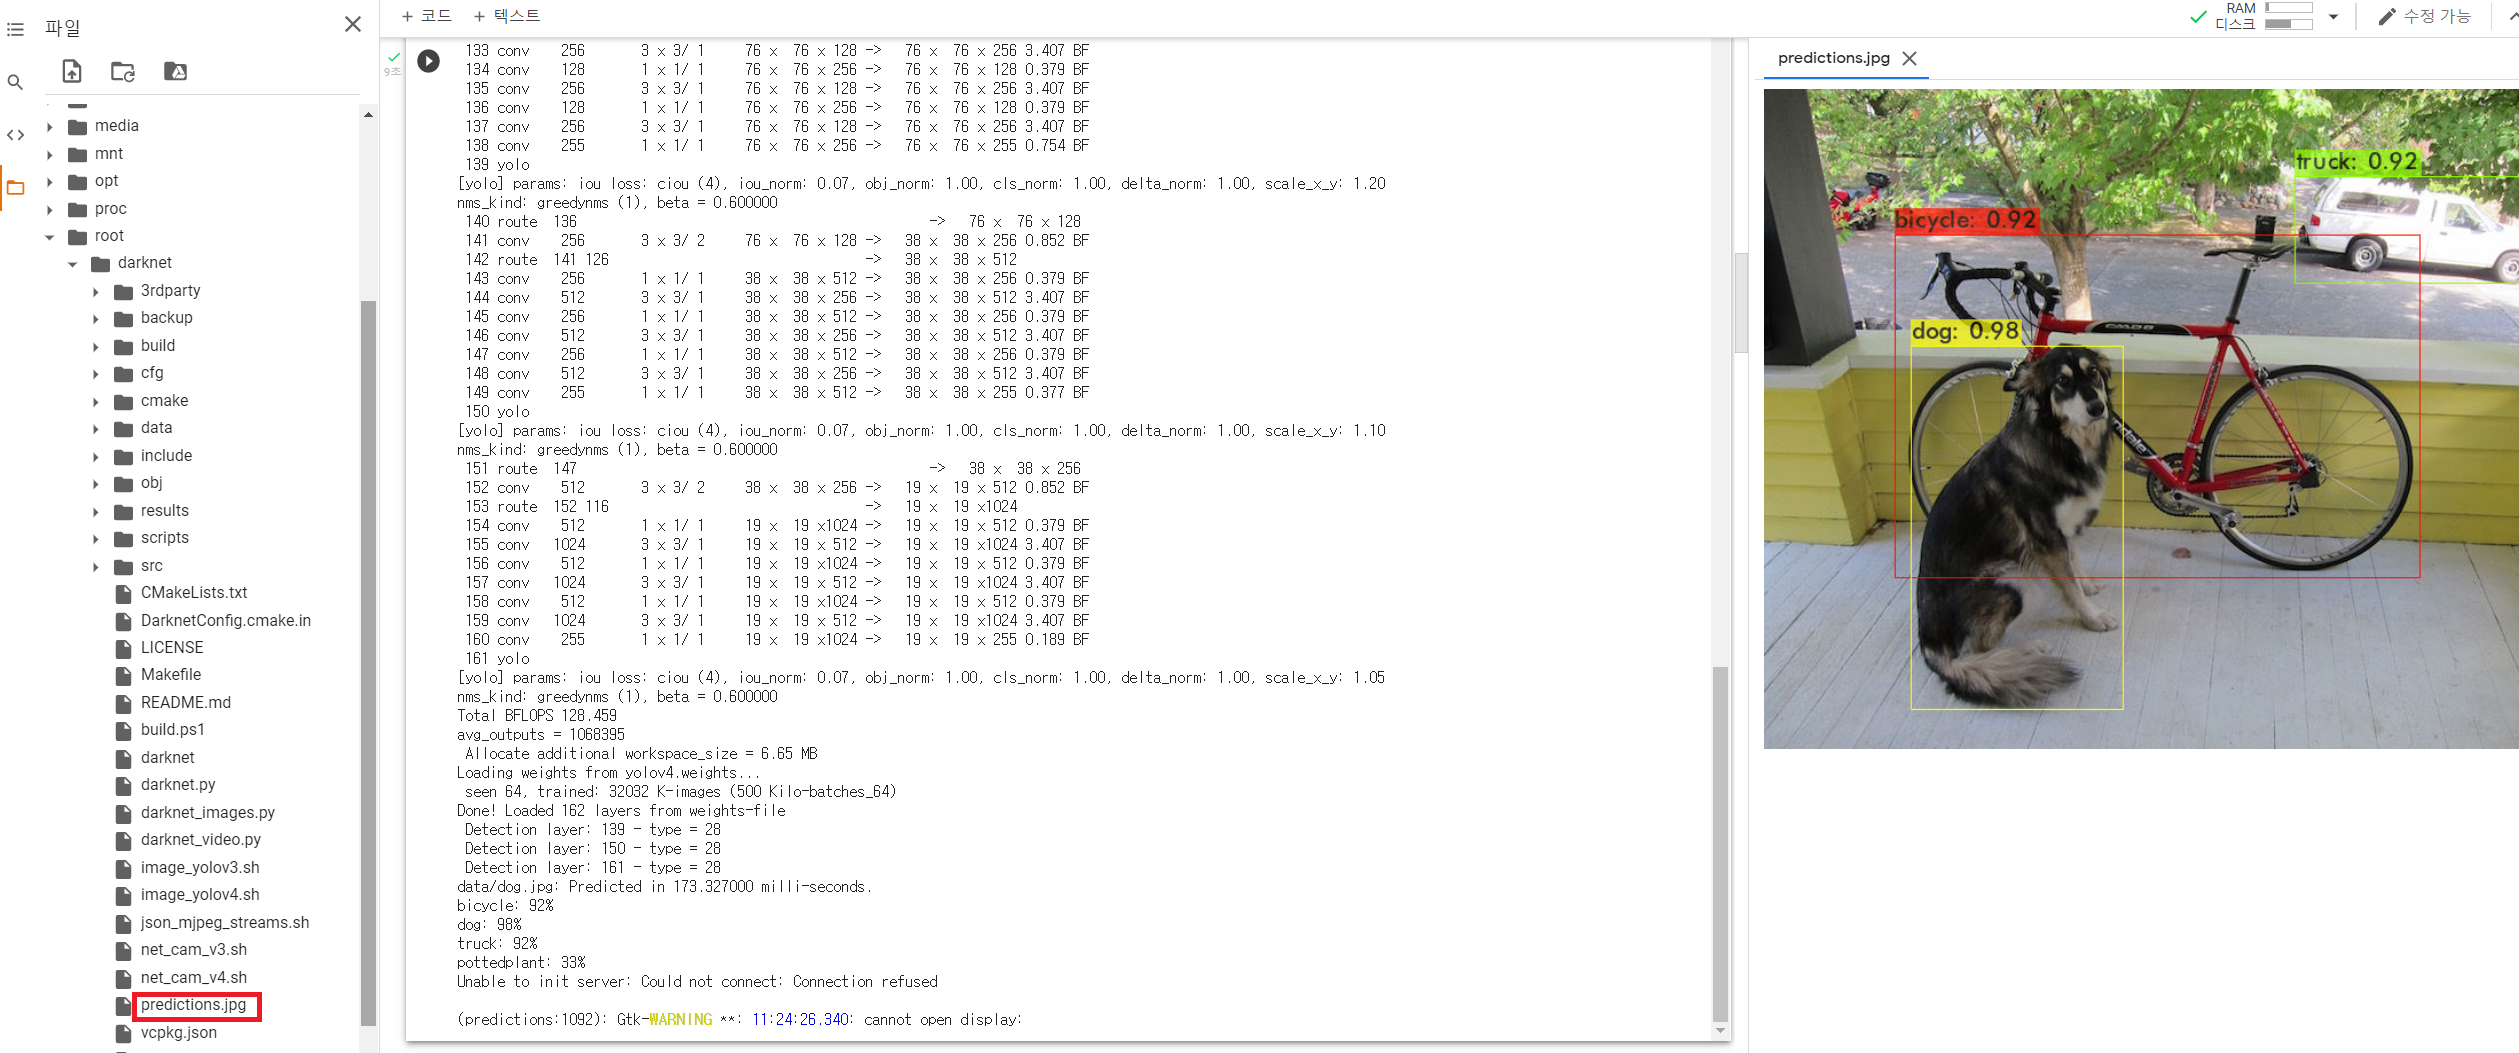

In [ ]:
#학습을 위한 yolov4.conv.137 다운로드
!gdown --id 1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp

Downloading...
From: https://drive.google.com/uc?id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp
To: /root/darknet/yolov4.conv.137
170MB [00:00, 255MB/s]


In [ ]:
#obj.data download
!gdown --id 1Gjojs40tHG9tHOO3V9XBxR8nG0UjGyC0

Downloading...
From: https://drive.google.com/uc?id=1Gjojs40tHG9tHOO3V9XBxR8nG0UjGyC0
To: /root/darknet/obj.data
100% 137/137 [00:00<00:00, 235kB/s]


In [ ]:
#obj.names download
!gdown --id 1IPBHmpsPdFGLkqeRmQzCrdW7sIH4rvms

Downloading...
From: https://drive.google.com/uc?id=1IPBHmpsPdFGLkqeRmQzCrdW7sIH4rvms
To: /root/darknet/obj.names
100% 28.0/28.0 [00:00<00:00, 45.0kB/s]


# class names 수정이 필요하면
names 리스트를 수정하고 셀을 실항하면 됩니다.
ex) name = ["error", "good"]

In [ ]:
#class names수정이 필요하다면 names list수정하고 셀 실행
names = ["error"]
with open("obj.names", "w", encoding="utf-8") as wf:
    for name in names:
        data = name + '\n'
        wf.write(data)

In [ ]:
#yolo-obj.cfg download
!gdown --id 13uNEvlnmvHulbdRCcCrOavwBOmVqg0hW

Downloading...
From: https://drive.google.com/uc?id=13uNEvlnmvHulbdRCcCrOavwBOmVqg0hW
To: /root/darknet/yolo-obj.cfg
100% 12.3k/12.3k [00:00<00:00, 19.4MB/s]


# yolo-obj.cfg를 수정합니다.
**밑의 셀을 보면 class_num이라는 변수가 있는데 class개수만큼 class_num 변수를 수정해주고 셀을 실행하면 됩니다.**


ex) class가 error, good 두개가 있으면 class_num = 2로 수정

In [ ]:
#modify yolo-obj.cfg
#class_num을 class개수대로 수정
class_num = 1 #



filter_num = (class_num + 5) * 3
if class_num < 3:
    max_batches = 6000
else:
    max_batches = clss_num * 2000
step1 = int(max_batches*0.8)
step2 = int(max_batches*0.9)

text_file_path = './yolo-obj.cfg'
new_text_content = ''
with open(text_file_path,'r') as f:
    lines = f.readlines()
    for i, l in enumerate(lines):
        if i == 19:
            new_string = 'max_batches = ' + str(max_batches) + '\n'
        elif i == 21:
            new_string = 'steps=' + str(step1) + ',' + str(step2) + '\n'
        elif i == 962:
            new_string = 'filters=' + str(filter_num) + '\n'
        elif i == 969:
            new_string = 'classes=' + str(class_num) + '\n'
        elif i == 1050:
            new_string = 'filters=' + str(filter_num) + '\n'
        elif i == 1057:
            new_string = 'classes=' + str(class_num) + '\n'
        elif i == 1138:
            new_string = 'filters=' + str(filter_num) + '\n'
        elif i == 1145:
            new_string = 'classes=' + str(class_num) + '\n'
        else:
            new_string = l
        
        if new_string:
            new_text_content += new_string
        else:
            new_text_content += ''
            
with open(text_file_path,'w') as f:
    f.write(new_text_content)

# roboflow 데이터 가져오기

roboflow에서 데이터를 가져오는데 yolo darknet형식이며 train, valid는 8:2가 좋습니다.

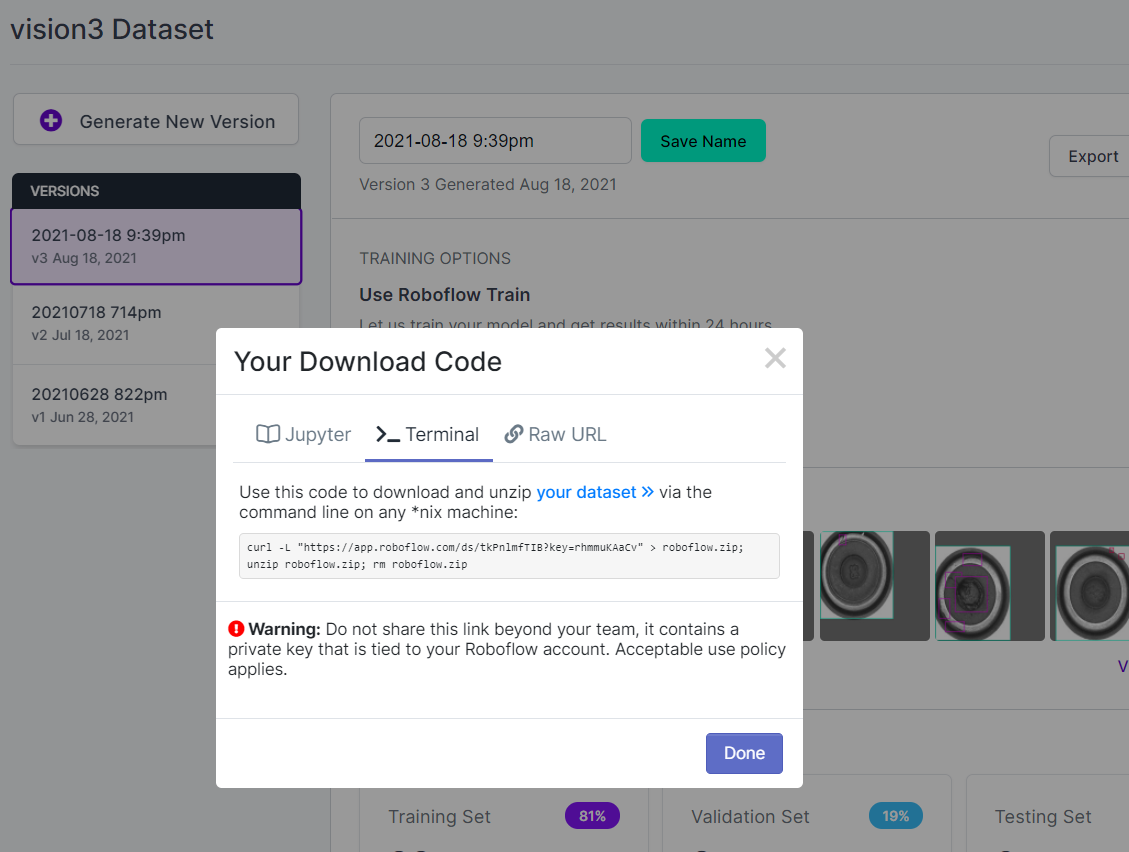

In [ ]:
#roboflow terminal data download

!curl -L "https://app.roboflow.com/ds/EVC9dKz9aV?key=5QEyBxMgck" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   890  100   890    0     0   1210      0 --:--:-- --:--:-- --:--:--  1209
100 3971k  100 3971k    0     0  3477k      0  0:00:01  0:00:01 --:--:-- 3477k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: train/
 extracting: train/101_jpg.rf.98cf167645cb5572463f5669b7adaabd.jpg  
 extracting: train/101_jpg.rf.98cf167645cb5572463f5669b7adaabd.txt  
 extracting: train/103_jpg.rf.50e6ebdfb38cad526bc34adac1738a75.jpg  
 extracting: train/103_jpg.rf.50e6ebdfb38cad526bc34adac1738a75.txt  
 extracting: train/104_jpg.rf.911b17b7a40a72686ec47cf6c26a7d07.jpg  
 extracting: train/104_jpg.rf.911b17b7a40a72686ec47cf6c26a7d07.txt  
 extracting: train/105_jpg.rf.aa05d7b6cba4f8ea25cb1dfe6725bdd3.jpg  
 extracting: train/105_jpg.rf.aa05d7b6cba4f8ea25cb1dfe6725bdd3.txt  
 extracting: train/106_jpg.rf.4e98b6aa0b49a970a396a

In [ ]:
#train.txt 파일 작성
f1 = os.listdir('./train')
imgs1 = [file for file in f1 if file.endswith(".jpg")]
with open("train.txt", "w", encoding="utf-8") as wf:
    for img in imgs1:
        data = './train/' + img + '\n'
        wf.write(data)

In [ ]:
#valid.txt 파일 작성
f2 = os.listdir('./valid')
imgs2 = [file for file in f2 if file.endswith(".jpg")]
with open("valid.txt", "w", encoding="utf-8") as wf:
    for img in imgs2:
        data = './valid/' + img + '\n'
        wf.write(data)

In [ ]:
#train start
!./darknet detector train obj.data yolo-obj.cfg yolov4.conv.137 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 1884834, rewritten_bbox = 0.161606 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.719000), count: 10, class_loss = 3.487064, iou_loss = 16.369694, total_loss = 19.856758 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.831645), count: 24, class_loss = 3.208316, iou_loss = 12.613810, total_loss = 15.822125 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.774609), count: 6, class_loss = 0.747288, iou_loss = 1.616891, total_loss = 2.364178 
 total_bbox = 1884874, rewritten_bbox = 0.161602 % 

 Tensor Cores are disabled until the first 3000 iterations are reached.

 2014: 1.551549, 1.618785 avg loss, 0.001000 rate, 5.040755 seconds, 128896 images, 8.358790 hours left
Loaded: 0.000035 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.802919), count: 5, class_loss = 1.668814, iou_

In [ ]:
#train restart
#train을 하다가 멈춘후 다시 시작할때는 yolo-obj_2000.weights 부분에 제일 최신의 가중치 파일명을 입력
!./darknet detector train obj.data yolo-obj.cfg backup/yolo-obj_2000.weights -dont_show #modify backup/yolo-obj_2000.weights

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.919463), count: 10, class_loss = 0.000024, iou_loss = 11.288122, total_loss = 11.288146 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.918913), count: 7, class_loss = 0.000018, iou_loss = 3.263919, total_loss = 3.263937 
 total_bbox = 2070377, rewritten_bbox = 0.155044 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.767925), count: 2, class_loss = 0.951195, iou_loss = 9.491921, total_loss = 10.443117 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.713779), count: 3, class_loss = 0.895991, iou_loss = 3.603865, total_loss = 4.499856 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.674034), count: 3, class_loss = 0.513255, iou_loss = 0.433374, total_loss = 0.946629 
 total_bbox = 2070385, rewritten_bbox = 0.155044

# train 이후에 mAP 알아보고 좋은 가중치 찾는법
final weights와 final 이전의 세개의 가중치에 대해서 mAP검사를 실시합니다. mAP가 가장 좋은 weights를 실제 detect때 사용하면 됩니다. 밑의 yolo-obj_7000.weights에 가중치 파일명을 입력하고 mAP를 비교하면 됩니다.


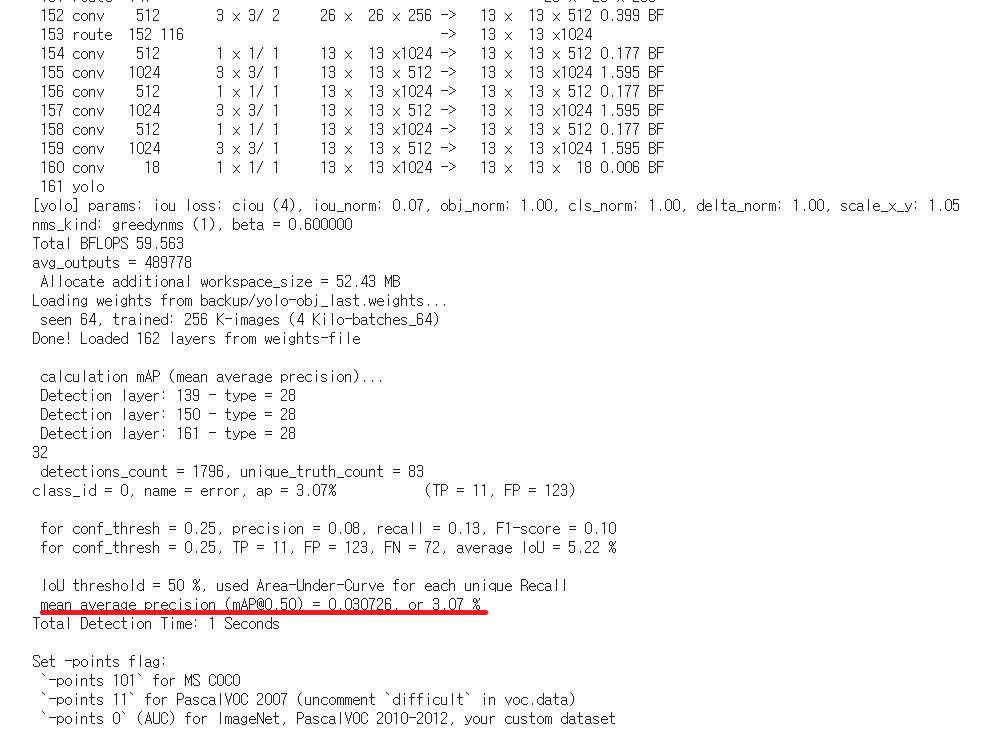

In [ ]:
!./darknet detector map obj.data yolo-obj.cfg backup/yolo-obj_final.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  